images2gif

```
import imageio
with imageio.get_writer(log_path + 'log.gif', mode='I') as f:
    for filename in files:
        image = imageio.imread(filename)
        f.append_data(image)
```

In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import universe
from universe import NAMES
from helper import *
import imageio
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
log_name = '_s2_100'

In [2]:
analysis(log_name)
img_path = g.log_path + 'gif/'
print("共持续" + str(g.end_year) + '年')
print_attr_info()

../log/log_s2_100/
共持续999年
模拟开始时，三类属性分布为:{0:结盟型,1:好战性,2:保守型}
0    39
2    33
1    28
Name: attr, dtype: int64
模拟结束时，三类属性分布为：{0:结盟型,1:好战性,2:保守型}
0    39
2    33
1    28
Name: attr, dtype: int64


In [3]:
for name in ('mlst', 'lbob', 'oclnum'):
    print(name)
    shrink = 1
    if name == 'oclnum':
        shrink = 0.1
    draw_gif(
        lambda x: plot_info(x, plot_type=name, shrink=shrink),
        img_path+str(name)+'.gif'
    )
print("可在log/gif/文件下看到动图")

mlst
lbob
oclnum
可在log/gif/文件下看到动图


In [4]:
attr_num = []
for i in range(g.end_year):
    df = get_year_df(i)
    df = df[df.oclnum!=0]
    counts = df.attr.value_counts()
    a = [0,0,0]
    for j in range(3):
        try:
            a[j] = counts[j]
        except KeyError:
            a[j] = 0
    attr_num.append([a[0], a[1], a[2]])

attr_num = pd.DataFrame(attr_num, columns=['DIP','ATT','CON'])

img = attr_num.plot()
img.get_figure().savefig(img_path + 'survival.jpg')

_s2_100
../log/log_s2_100/
共持续999年
模拟开始时，三类属性分布为:{0:结盟型,1:好战性,2:保守型}
0    39
2    33
1    28
Name: attr, dtype: int64
模拟结束时，三类属性分布为：{0:结盟型,1:好战性,2:保守型}
0    39
2    33
1    28
Name: attr, dtype: int64
_s2_300
../log/log_s2_300/
共持续999年
模拟开始时，三类属性分布为:{0:结盟型,1:好战性,2:保守型}
1    125
0    101
2     74
Name: attr, dtype: int64
模拟结束时，三类属性分布为：{0:结盟型,1:好战性,2:保守型}
1    125
0     59
2     56
Name: attr, dtype: int64
_s2_1000
../log/log_s2_1000/
共持续999年
模拟开始时，三类属性分布为:{0:结盟型,1:好战性,2:保守型}
1    352
0    329
2    319
Name: attr, dtype: int64
模拟结束时，三类属性分布为：{0:结盟型,1:好战性,2:保守型}
2    7
1    5
0    2
Name: attr, dtype: int64
_s1_1000
../log/log_s1_1000/
共持续599年
模拟开始时，三类属性分布为:{0:结盟型,1:好战性,2:保守型}
2    360
0    340
1    300
Name: attr, dtype: int64
模拟结束时，三类属性分布为：{0:结盟型,1:好战性,2:保守型}
0    110
Name: attr, dtype: int64
_s4_100
../log/log_s4_100/
共持续935年
模拟开始时，三类属性分布为:{0:结盟型,1:好战性,2:保守型}
0    41
1    32
2    27
Name: attr, dtype: int64
模拟结束时，三类属性分布为：{0:结盟型,1:好战性,2:保守型}
1    4
0    4
2    3
Name: attr, dtype: int64


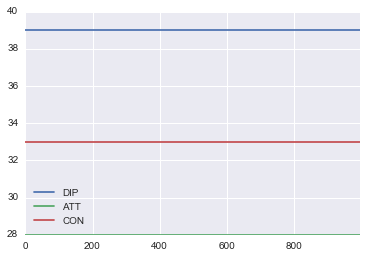

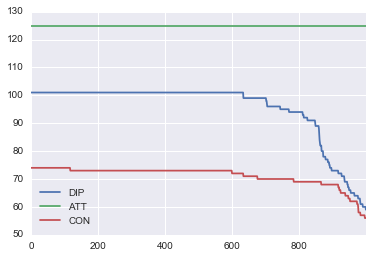

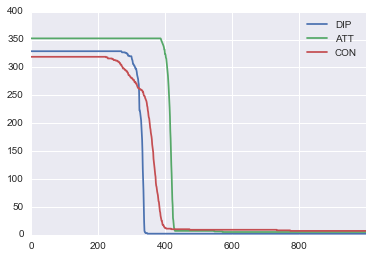

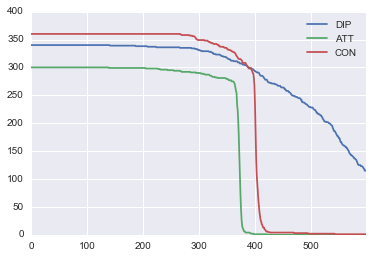

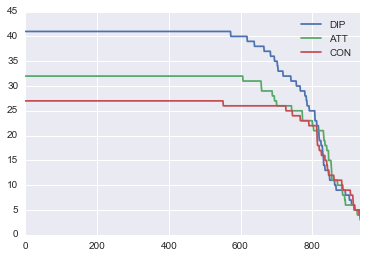

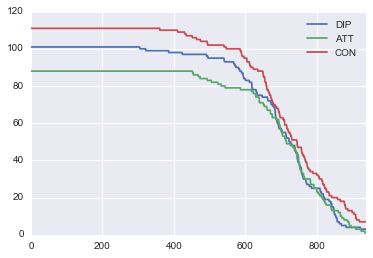

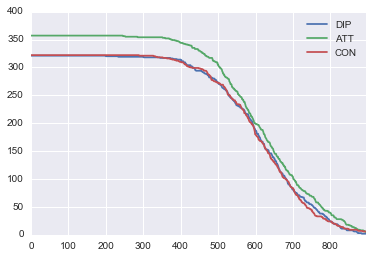

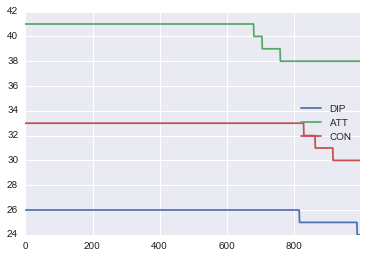

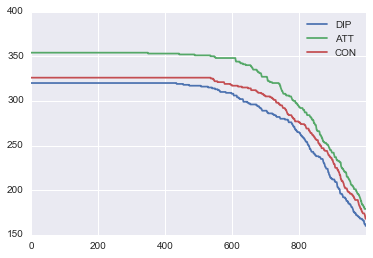

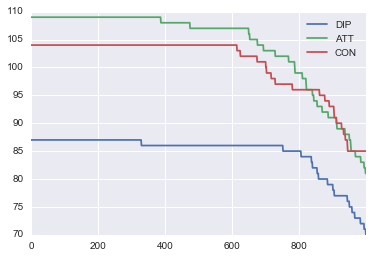

In [7]:
def go(name):
    analysis(name)
    img_path = g.log_path + 'gif/'
    print("共持续" + str(g.end_year) + '年')
    print_attr_info()
    attr_num = []
    for i in range(g.end_year):
        df = get_year_df(i)
        df = df[df.oclnum!=0]
        counts = df.attr.value_counts()
        a = [0,0,0]
        for j in range(3):
            try:
                a[j] = counts[j]
            except KeyError:
                a[j] = 0
        attr_num.append([a[0], a[1], a[2]])

    attr_num = pd.DataFrame(attr_num, columns=['DIP','ATT','CON'])

    img = attr_num.plot()
    img.get_figure().savefig(img_path + 'survival.jpg')
    
for name in ('_s2_100','_s2_300','_s2_1000','_s1_1000','_s4_100','_s4_300','_s4_1000','_s5_100','_s5_1000','_s5_300'):
    print(name)
    go(name)